In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


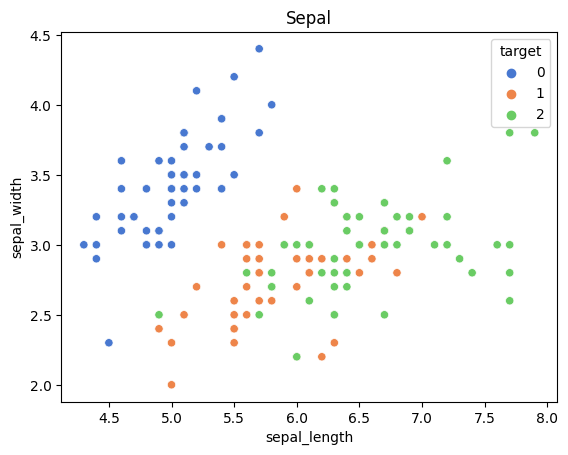

In [2]:
# 꽃받침 시각화
import seaborn as sns

sns.scatterplot(
    x="sepal_length",
    y="sepal_width",
    hue='target',
    palette='muted',
    data=irisDF
)

plt.title("Sepal")
plt.show()

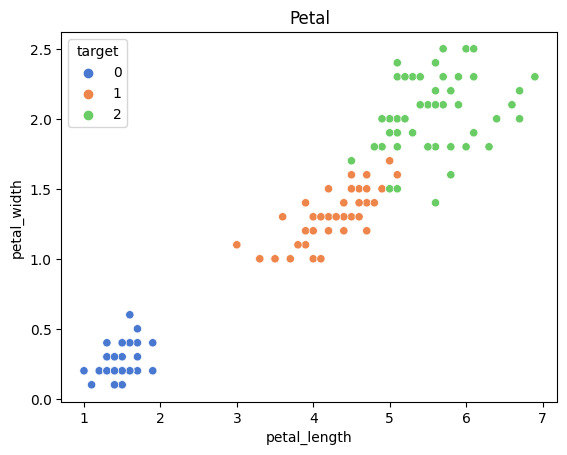

In [3]:
# 꽃잎 시각화

sns.scatterplot(
    x="petal_length",
    y="petal_width",
    hue='target',
    palette='muted',
    data=irisDF
)

plt.title("Petal")
plt.show()

# PCA로 차원 변환

In [4]:
# 4차원 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# n_components : 축소할 차원(주성분 개수), 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(
    irisDF.drop("target", axis=1)
)

# 데이터 변환 수행(데이터의 차원수가 변경되기 때문에 PCA도 Transformer)
iris_pca = pca_2.transform(irisDF.drop("target", axis=1))

iris_pca.shape

(150, 2)

In [5]:
# PCA로 변환된 데이터를 데이터 프레임으로 만들기
pca_columns = ["Component 1", "Component 2"]
iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_columns
)

iris_pca_df['target'] = iris.target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


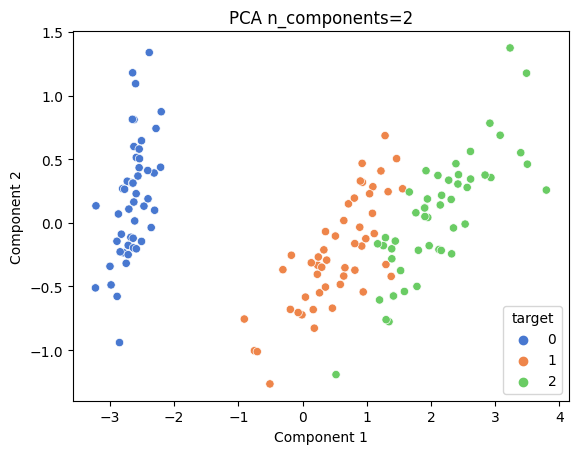

In [6]:
# PCA 컴포넌트 시각화
import seaborn as sns

sns.scatterplot(
    x="Component 1",
    y="Component 2",
    hue='target',
    palette='muted',
    data=iris_pca_df
)

plt.title("PCA n_components=2")
plt.show()

# [실습]
1. PCA를 적용하지 않고 `RandomForestClassifier`사용해서 Cross Validation
2. PCA를 적용하고 (n_component=2) `Cross Validation`

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [8]:
# 4차원 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(irisDF.drop("target", axis=1))

# 데이터 변환 수행
iris_pca = pca_2.transform(irisDF.drop("target", axis=1))

# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ["Component 1", "Component 2"]
iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_columns
)
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [9]:
rcf = RandomForestClassifier(random_state=156)

pca_X = iris_pca_df[['Component 1', 'Component 2']]
scores_pca = cross_val_score(rcf, pca_X, iris_pca_df['target'], scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.94 0.96 0.98]
PCA 변환 데이터 평균 정확도: 0.96
